In [1]:
using Pkg
Pkg.activate("../IVTmodel")
Pkg.instantiate()
include("../modules/IVTmodel.jl")
#Generates settings for parameters used
fittingmodel = setupmodel_IVT4()
#Imports calibration data from csv files
modeldata = importakamadata()
osumidata = importosumidata()
#Imports PPiase validation data
PPiasedata = importakamaPPiasedata();
akamafittedparametersmatrix = Matrix(CSV.read("../outputs/fittedparameters.csv", DataFrame,header=false))
akamafittedparameterslist = reshape(akamafittedparametersmatrix,(size(akamafittedparametersmatrix)[1],))
akamafittedcovariancematrix = Matrix(CSV.read("../outputs/covariancematrix.csv", DataFrame,header=false))
akamafittedparams = fullparameterset(fittingmodel,akamafittedparameterslist)
printresidual(fittingmodel,modeldata,osumidata,akamafittedparameterslist)

  Activating project at `C:\Users\ChemeGrad2021\Documents\Braatz Group\MRNA Synthesis\Published code\IVT2.0\IVTmodel`
Precompiling project...
  ? Metrics
Precompiling Metrics
        Info Given Metrics was explicitly requested, output will be shown live 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
  ? Metrics
[ Info: Precompiling Metrics [cb9f3049-315b-4f05-b90c-a8adaec4da78]
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
[ Info: Skipping precompilation since __precompile__(false). Importing Metrics [cb9f3049-315b-4f05-b90c-a8adaec4da78].
┌ Warning: Replacing docs for `Metrics.bin_to_cat :: Tuple{Any, Any}` in module `Metrics`
└ @ Base.Docs docs\Docs.jl:243
┌ Warning: Replacing docs for `Metrics.confusion_matrix :: Tuple{Any, Any}` in module `Metrics`
└ @ Base.Docs docs\Docs.jl:243
┌ Warning: Replacing docs for `Metri

Model has 24 fitted parameters, 16 of which have a bayesian prior
Total Residual:                        1115.7
Components of residual:
Concentration Trajectories (Figure 2): 455.1
Initial Reaction Rate (Figure 3A):     200.1
Mg2PPi solubility (Figure 3B):         221.0
Parameter priors:                      152.9
pH Effect Data:                        86.5


In [2]:
include("../modules/IVTmodel.jl")

plotMg2PPiphasediagram (generic function with 1 method)

<h1>Planning pH perturbations for IVT<h1>

In [3]:
function perturbedpH(HClperturbation)
    if HClperturbation<0
        NaOHadded = -HClperturbation*1e-3
        HCladded = 0e-3
    else
        HCladded =  HClperturbation*1e-3
        NaOHadded = 0e-3
    end
    BufferperNTP = 3.4
    NaperNTP = 1.55

    NTPtot = 20e-3
    Mgtot = 15e-3
    Buffer = 45e-3
    buffer_pka = 8.1
    Cl = 2*Mgtot+Buffer*((1e-8*10^buffer_pka)/(1e-8*10^buffer_pka+1)) #Cl from HCl in Buffer - remove if using HEPES   note: removed 1e-8 -1e-6
    Buffertot = Buffer+BufferperNTP*NTPtot

    Cltot = 1.8e-2+Cl+HCladded
    Natot = 1e-7+NaOHadded+NaperNTP*NTPtot

    (H,Mg,Na) = getfreeconcentrations(akamafittedparams, NTPtot, Mgtot, Buffertot, 1e-7, 1e-7, Natot, Cltot)
    ph_val = -log10(H)
end

perturbedpH (generic function with 1 method)

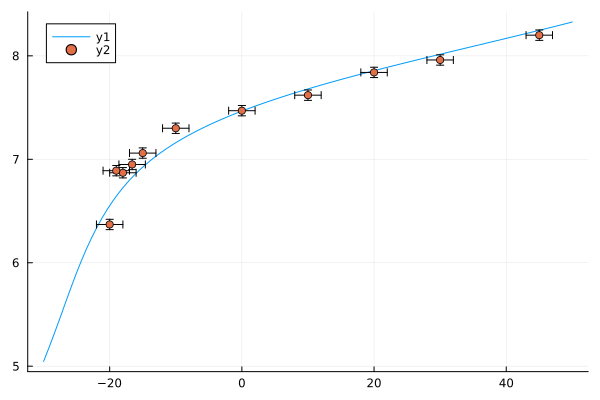

In [64]:
perturbationrange = LinRange(-50,30,100)
predictedpH = [perturbedpH(perturbation) for perturbation in perturbationrange]
perturbation = [-45,-30,-20,-10,0,10,15,16.6,18,19,20]
pH = [8.2,7.96,7.84,7.62,7.47,7.3,7.06,6.95,6.87,6.89,6.37]
approxrxnrate = [2.0/30,1.8/30,1.0/30,1.0/30,0.7/30,0.40/30,0.3/30]
plot(-perturbationrange,predictedpH)
scatter!(-perturbation, pH,yerror = 0.05, xerror = 2)

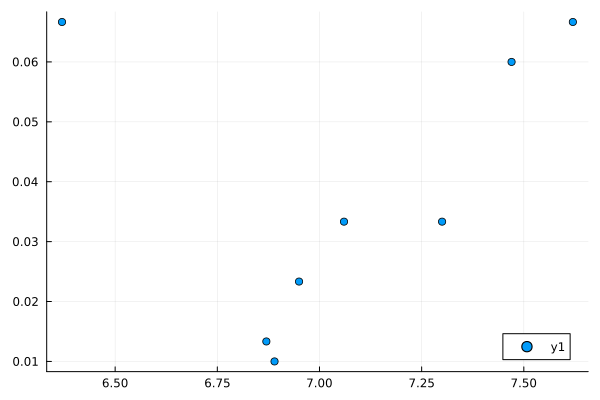

In [4]:
using Plots
pH = [7.62,7.47,7.3,7.06,6.95,6.87,6.89,6.37]
approxrxnrate = [2.0/30,1.8/30,1.0/30,1.0/30,0.7/30,0.40/30,0.3/30]
scatter(pH,approxrxnrate)

<h1>MgPPi solubility experiment planning<h1>

In [2]:
Mgvals = [3.7372
3.7223
2.9562
2.8639
1.8100
1.8860
0.8299
0.9258
0.1425
0.1341
0.2765
0.2883
0.4273
0.4045
0.5588
0.5482
0.7152
1.2614
1.7254
1.4588
2.4047
1.7291
2.9670
3.0162
7.9118
7.8593
6.0483
5.8753
3.9750
3.8829
1.5280
1.6089
0.1526
0.145
0.370
0.347
0.510
0.463
0.600
0.625
0.852
0.853
1.063
1.158
1.394
1.400
1.859
1.744
16.410
15.492
12.689
12.136
7.956
7.955
3.848
3.624
0.189
0.162
0.982
0.740
1.091
1.374
1.134
1.496
1.604
1.985
2.108
2.114
2.976
2.996
33.151
31.893
24.530
24.074
16.151
14.695
7.468
7.114
0.168
0.143
0.902
1.767
1.233
1.350
1.378
1.366
66.081
61.903
50.398
47.096
34.625
31.059
17.310
15.774
0.319
0.187
0.162
0.150
0.179
0.185]

Ppivals = [0.0009
0.0006
0.0169
0.0199
0.0251
0.0251
0.0322
0.0294
0.1364
0.1212
0.7228
0.7600
1.4186
1.3640
2.5105
2.4166
4.7325
4.7596
6.7927
6.9441
9.0008
8.9156
11.1444
11.3925
0.0981
0.0035
0.0337
0.0280
0.0576
0.0563
0.0627
0.0611
0.2183
0.185
1.295
1.192
2.367
2.316
4.389
4.443
8.266
8.276
11.854
11.953
15.451
15.925
19.438
18.957
0.011
0.004
0.082
0.072
0.104
0.105
0.106
0.101
0.113
0.118
2.824
1.980
4.651
4.471
8.094
8.294
15.824
15.728
23.293
22.346
30.144
30.600
0.016
0.011
0.179
0.168
0.168
0.171
0.145
0.131
0.168
0.181
3.717
4.977
8.181
8.156
15.852
15.481
0.034
0.022
0.372
0.358
0.235
0.208
0.121
0.106
0.793
0.071
0.120
0.122
0.276
0.295]

100-element Vector{Float64}:
 0.0009
 0.0006
 0.0169
 0.0199
 0.0251
 0.0251
 0.0322
 0.0294
 0.1364
 0.1212
 0.7228
 0.76
 1.4186
 ⋮
 0.372
 0.358
 0.235
 0.208
 0.121
 0.106
 0.793
 0.071
 0.12
 0.122
 0.276
 0.295

┌ Warning: scale log is unsupported with Plots.GRBackend().
│ Choose from: [:identity, :ln, :log10, :log2]
└ @ Plots C:\Users\ChemeGrad2021\.julia\packages\Plots\sxUvK\src\args.jl:1584
┌ Warning: scale log is unsupported with Plots.GRBackend().
│ Choose from: [:identity, :ln, :log10, :log2]
└ @ Plots C:\Users\ChemeGrad2021\.julia\packages\Plots\sxUvK\src\args.jl:1584


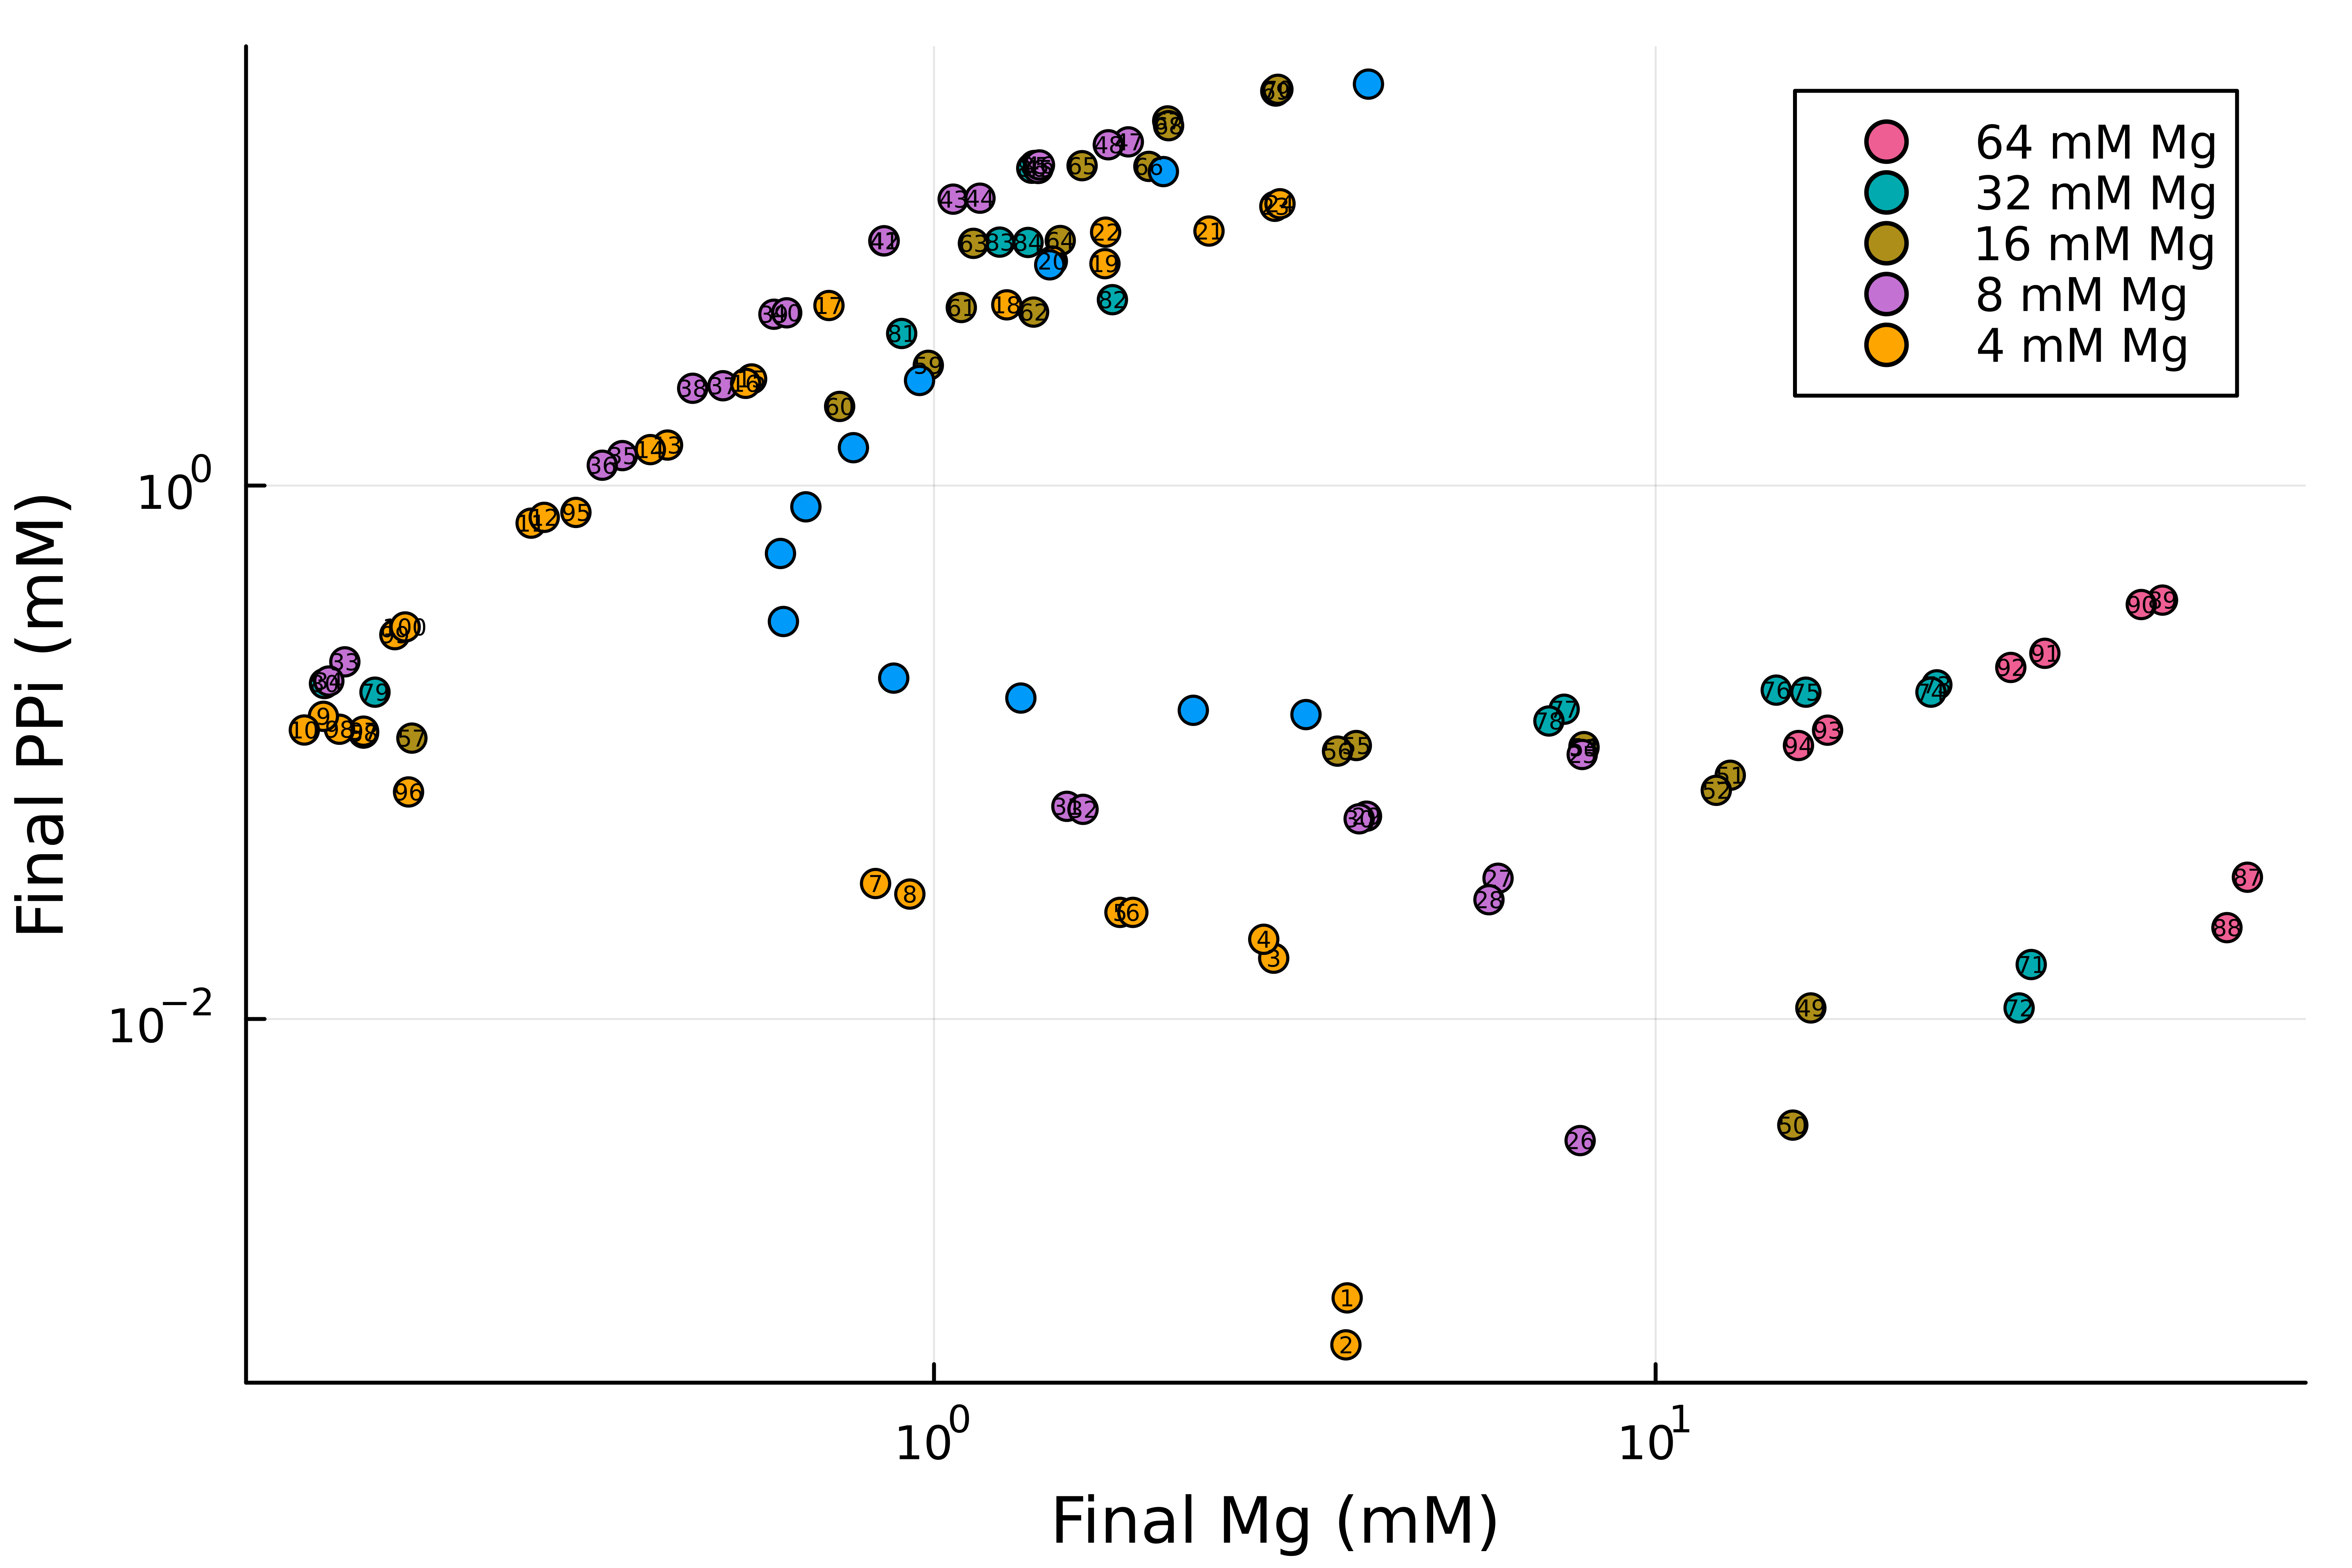

In [3]:
phasediagram = plotMg2PPiphasediagram(fittingmodel,akamafittedparams, akamafittedcovariancematrix, time = 2400000)
scatter!(Mgvals[1:24],Ppivals[1:24], z_order = :back, label = "4 mM Mg", color = :orange)
scatter!(Mgvals[95:end],Ppivals[95:end], z_order = :back, label = "", color = :orange)
scatter!(Mgvals[25:48],Ppivals[25:48], z_order = :back, label = "8 mM Mg")
scatter!(Mgvals[49:70],Ppivals[49:70], z_order = :back, label = "16 mM Mg")
scatter!(Mgvals[71:86],Ppivals[71:86], z_order = :back, label = "32 mM Mg")
scatter!(Mgvals[87:94],Ppivals[87:94], z_order = :back, label = "64 mM Mg")
annotate!(Mgvals, Ppivals, text.([string(i) for i in 1:length(Mgvals)], :black, :center,4), dpi = 1000)
savefig(phasediagram,"../figures/25Cpredictedphasediagram.png")
phasediagram

In [4]:
function drawprecipline!(plt,(Mg,PPi))
    PPioffset = PPi-0.5*Mg
    rangemin = 0.01+max(0,Mg-2*PPi)
    Mgrange = LinRange(rangemin,64,1000)
    plot!(plt,Mgrange,0.5 .* Mgrange .+ PPioffset,label = "")
    scatter!([Mg],[PPi],mc = :black,label = "")
end

drawprecipline! (generic function with 1 method)

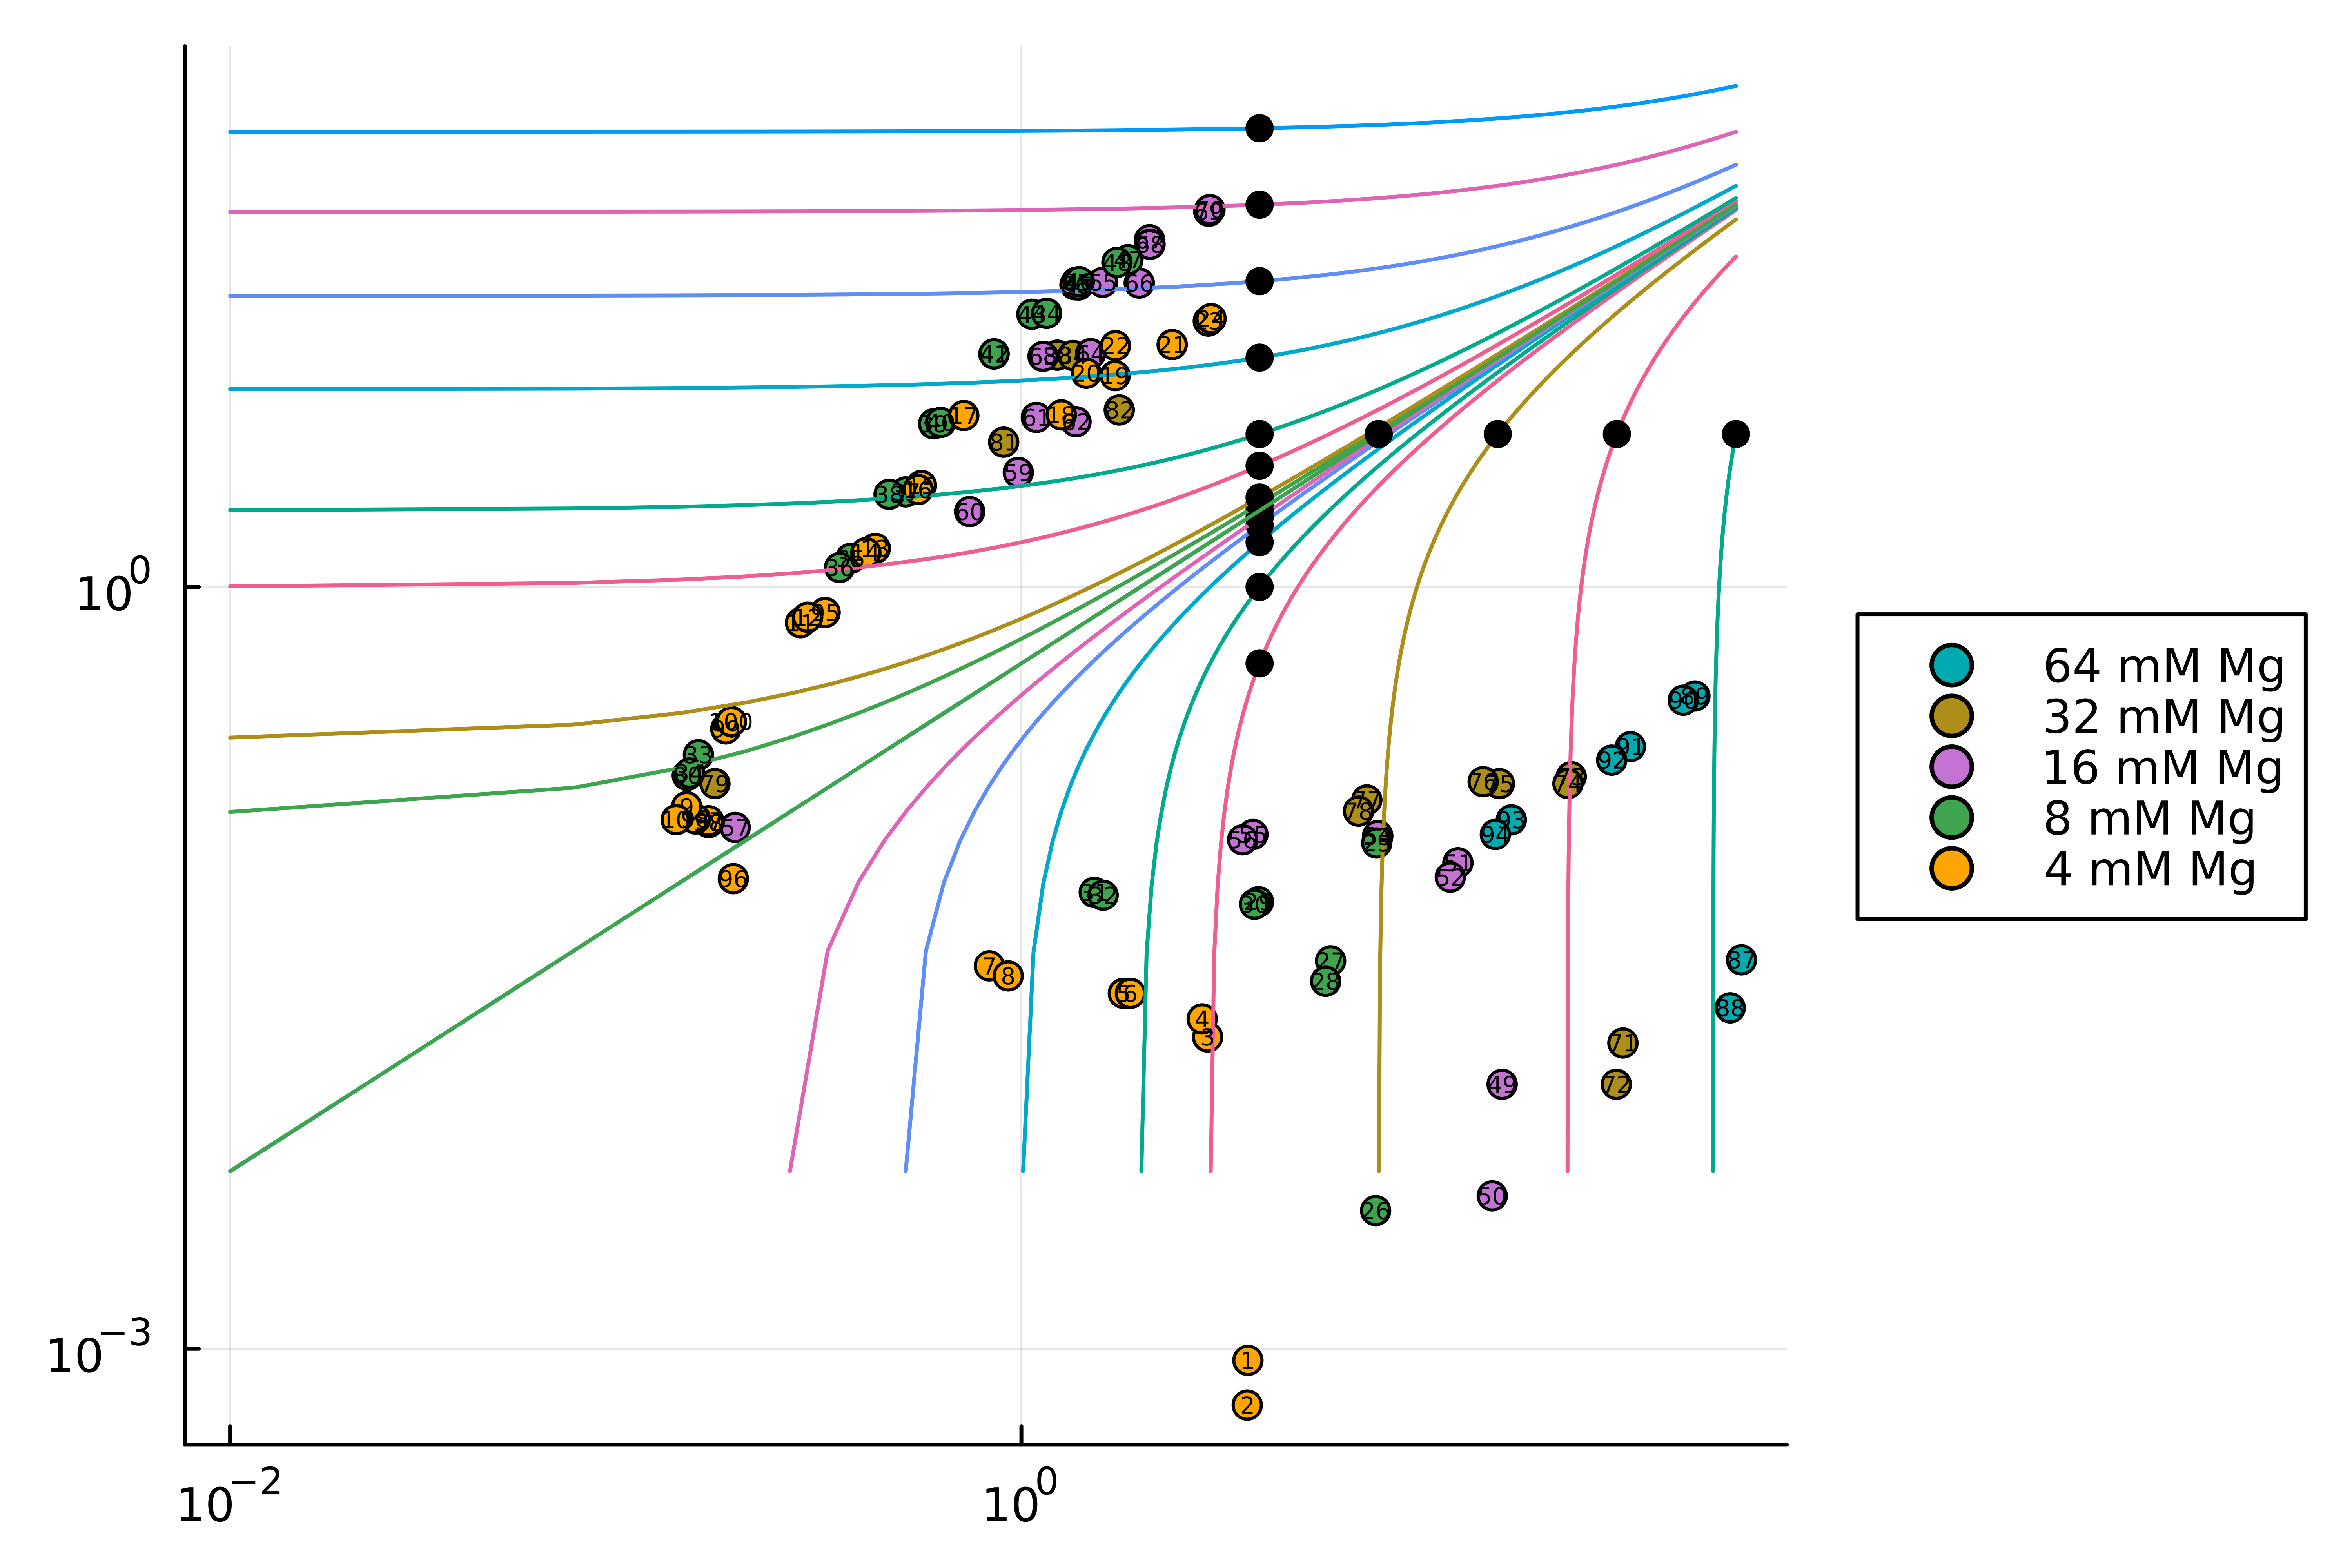

In [5]:
Mgrange1 = LinRange(0.1,20,1000)
Mgrange2 = LinRange(0.51,20,1000)
Mgrange3 = LinRange(1.01,20,1000)

phasediagram = plot(xscale= :log, yscale = :log)#plotMg2PPiphasediagram(fittingmodel,akamafittedparams, akamafittedcovariancematrix, time = 2400000)
scatter!(Mgvals[1:24],Ppivals[1:24], z_order = :back, label = "4 mM Mg", color = :orange)
scatter!(Mgvals[95:end],Ppivals[95:end], z_order = :back, label = "", color = :orange)
scatter!(Mgvals[25:48],Ppivals[25:48], z_order = :back, label = "8 mM Mg")
scatter!(Mgvals[49:70],Ppivals[49:70], z_order = :back, label = "16 mM Mg")
scatter!(Mgvals[71:86],Ppivals[71:86], z_order = :back, label = "32 mM Mg")
scatter!(Mgvals[87:94],Ppivals[87:94], z_order = :back, label = "64 mM Mg")

drawprecipline!(phasediagram,(4,0.5))
drawprecipline!(phasediagram,(4,1.0))
drawprecipline!(phasediagram,(4,1.5))
drawprecipline!(phasediagram,(4,1.75))
drawprecipline!(phasediagram,(4,1.875))

drawprecipline!(phasediagram,(4,2.0))
drawprecipline!(phasediagram,(4,2.125))

drawprecipline!(phasediagram,(4,2.25))
drawprecipline!(phasediagram,(4,3.0))
drawprecipline!(phasediagram,(4,4))
drawprecipline!(phasediagram,(4,8))
drawprecipline!(phasediagram,(4,16))
drawprecipline!(phasediagram,(4,32))
drawprecipline!(phasediagram,(4,64))
drawprecipline!(phasediagram,(8,4))
drawprecipline!(phasediagram,(16,4))
drawprecipline!(phasediagram,(32,4))
drawprecipline!(phasediagram,(64,4))

annotate!(Mgvals, Ppivals, text.([string(i) for i in 1:length(Mgvals)], :black, :center,4), dpi = 1000)
plot!(legend = :outerright)
savefig(phasediagram,"../figures/ATPsolubilitySoroush/NoATPpredictedphasediagram.png")
phasediagram

In [6]:
Mg25 = [2.93
2.99
1.88
1.89
0.91
0.89
0.50
0.49
0.26
0.33
0.43
0.44
0.56
0.59
0.82
0.82
1.38
1.44
0.67
0.64
0.27
0.28
7.55
7.58
23.85
24.00
56.96
57.82
0.57
0.55]
PPi25 = [0.04
0.05
0.04
0.04
0.06
0.07
0.12
0.11
0.26
0.31
0.62
0.62
0.96
0.97
1.51
1.57
2.79
2.81
1.52
1.42
0.20
0.20
0.09
0.09
0.13
0.13
0.18
0.18
0.58
0.55]

30-element Vector{Float64}:
 0.04
 0.05
 0.04
 0.04
 0.06
 0.07
 0.12
 0.11
 0.26
 0.31
 0.62
 0.62
 0.96
 ⋮
 1.52
 1.42
 0.2
 0.2
 0.09
 0.09
 0.13
 0.13
 0.18
 0.18
 0.58
 0.55

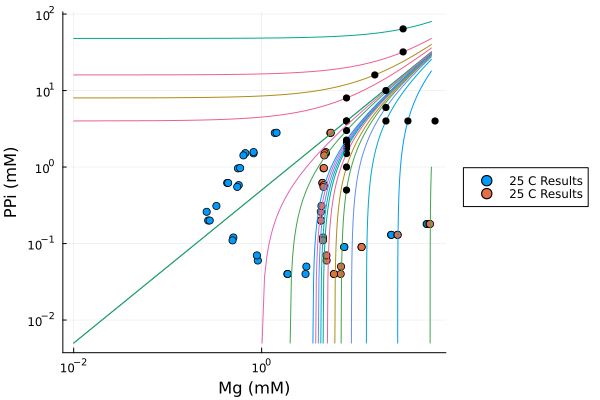

In [7]:
Mgrange1 = LinRange(0.1,20,1000)
Mgrange2 = LinRange(0.51,20,1000)
Mgrange3 = LinRange(1.01,20,1000)

phasediagram = plot(xscale = :log, yscale = :log)#plotMg2PPiphasediagram(fittingmodel,akamafittedparams, akamafittedcovariancematrix, time = 2400000)
scatter!(Mg25,PPi25, label = "25 C Results", xlabel = "Mg (mM)", ylabel = "PPi (mM)")
scatter!(Mg25 .+4,PPi25, label = "25 C Results", xlabel = "Mg (mM)", ylabel = "PPi (mM)")

drawprecipline!(phasediagram,(8,0.5))
drawprecipline!(phasediagram,(8,1.0))
drawprecipline!(phasediagram,(8,1.5))
drawprecipline!(phasediagram,(8,1.75))
drawprecipline!(phasediagram,(8,1.875))

drawprecipline!(phasediagram,(8,2.0))
drawprecipline!(phasediagram,(8,2.125))

drawprecipline!(phasediagram,(8,2.25))
drawprecipline!(phasediagram,(8,3.0))
drawprecipline!(phasediagram,(8,4))
drawprecipline!(phasediagram,(8,8))
# drawprecipline!(phasediagram,(8,16))
# drawprecipline!(phasediagram,(8,32))
# drawprecipline!(phasediagram,(8,64))
drawprecipline!(phasediagram,(8,4))
drawprecipline!(phasediagram,(21,4))
drawprecipline!(phasediagram,(21,6))
drawprecipline!(phasediagram,(21,10))

drawprecipline!(phasediagram,(36,4))
drawprecipline!(phasediagram,(70,4))
#drawprecipline!(phasediagram,(20,12))
drawprecipline!(phasediagram,(16,16))
drawprecipline!(phasediagram,(32,32))
drawprecipline!(phasediagram,(32,64))
# drawprecipline!(phasediagram,(60,4))

plot!(legend = :outerright)
savefig(phasediagram,"../figures/ATPsolubilitySoroush/4mMATPpoints.png")
phasediagram

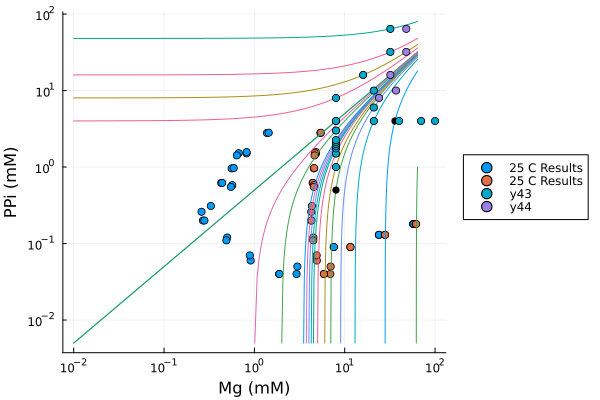

In [8]:
mgC=[8
8
8
8
8
8
8
8
8
8
8
21
21
21
40
70
100
16
32
32]

PPiC = [1
1.5
1.75
1.875
2
2.125
2.25
3
4
8
4
4
6
10
4
4
4
16
32
64
]

mg20C = [24
37
32
48
48
]
ppi20C = [8
10
16
32
64
]
scatter!(mgC,PPiC)
scatter!(mg20C,ppi20C)


<h1>Applying Standard Model to Recent PPisolubility Data<h1>

In [ ]:
#Need to alter charge balance to make this plot
initialsolubilityplot = plotMgsolubilitycurves(fittingmodel,akamafittedparameterslist, akamafittedcovariancematrix,"../data/internal/lowconcentrationpure.csv")
savefig(initialsolubilityplot,"../figures/initial_solubility_experiments.png")
initialsolubilityplot

<h1>Applying standard model to Sodium Pyrophosphate pH Data<h1>

In [ ]:
#Tetrabasic, no buffer
PPirange = (1e-7,0.2)
PPipoints = 5
PPi_inputs = [0.1/2^i for i in 0:9]
TBNB_pH = [10.37,10.32,10.26,10.15,10.06,9.82,9.61,9.41,9.16,8.91,6.71]
TBWB_pH = [9.28,9.05,8.77,8.45,8.18,8.00,7.90,7.85,7.80,7.80,7.80]
DBNB_pH = [4.05,4.16,4.31,4.51,4.70,4.99,5.21,5.45,5.72,5.97,6.71]
DBWB_pH = [5.23,5.71,6.29,7.19,7.57,7.70,7.75,7.77,7.79,7.79,7.80]
plt = plot(xlabel = "Concentration of Pyrophosphate (mM)", ylabel = "pH", ylims = (2.5,Inf), legend = :outertop, size = (500,500))
plotpHcurvePPi!(plt,fittingmodel,akamafittedparameterslist, akamafittedcovariancematrix, 1e-9,4,PPi_inputs,TBNB_pH, :blue; PPirange = PPirange, showconfidence = true, PPipoints = PPipoints, plotlabel = "Tetrabasic, no buffer")
plotpHcurvePPi!(plt,fittingmodel,akamafittedparameterslist, akamafittedcovariancematrix, 0.040,4,PPi_inputs,TBWB_pH, :red; PPirange = PPirange, showconfidence = true, PPipoints = PPipoints, plotlabel = "Tetrabasic, with buffer")
#plotpHcurvePPi!(plt,fittingmodel,akamafittedparameterslist, akamafittedcovariancematrix, 1e-9,2,PPi_inputs,DBNB_pH, :orange; PPirange = PPirange, showconfidence = true, PPipoints = PPipoints, plotlabel = "Dibasic, no buffer")
#plotpHcurvePPi!(plt,fittingmodel,akamafittedparameterslist, akamafittedcovariancematrix, 0.040,2,PPi_inputs,DBWB_pH, :green; PPirange = PPirange, showconfidence = true, PPipoints = PPipoints, plotlabel = "Dibasic, with buffer")
plotpHcurvePPi!(plt,fittingmodel,akamafittedparameterslist, akamafittedcovariancematrix, 1e-9,3.9, [],[], :black; PPirange = PPirange, showconfidence = true, PPipoints = PPipoints, plotlabel = "Solution on our shelf")
plotpHcurvePPi!(plt,fittingmodel,akamafittedparameterslist, akamafittedcovariancematrix, 0.040,3.07, [],[], :purple; PPirange = PPirange, showconfidence = true, PPipoints = PPipoints, plotlabel = "3.07 Ratio of Na to PPi, with Buffer")

In [ ]:
plt2 = plot(xlabel = "Concentration of Dibasic ATP (mM)", ylabel = "pH", legend = :outertop, size = (700,500))
ATPpoints = 25
ATPrange = (1e-10,10^-(0.5))
plotpHcurveATP!(plt2,fittingmodel,akamafittedparameterslist, akamafittedcovariancematrix,1e-8, :blue; ATPrange = (1e-8,1e-5), showconfidence = true, plotlabel = "Dibasic: Unbuffered", ATPpoints = ATPpoints)
plotpHcurveATP!(plt2,fittingmodel,akamafittedparameterslist, akamafittedcovariancematrix,0.040, :red; ATPrange = (1e-8,1e-2), showconfidence = true, plotlabel = "Dibasic: Buffered with 40 mM Tris", ATPpoints = ATPpoints)
plotpHcurveATP!(plt2,fittingmodel,akamafittedparameterslist, akamafittedcovariancematrix,0.040, :green; ATPrange = ATPrange, showconfidence = true, plotlabel = "Dibasic: Buffered  with 40 mM Tris and 1.92:1.00 Ratio NaOH:ATP", ATPpoints = ATPpoints, NaOHmoleratio = 1.99)

In [ ]:
plotpHcurveATP!(plt2,fittingmodel,akamafittedparameterslist, akamafittedcovariancematrix,1e-8, :orange; ATPrange = ATPrange, showconfidence = true, plotlabel = "Dibasic: Buffered with 8:1 ratio Tris:ATP", ATPpoints = ATPpoints, trisratio = 2.5)
plotpHcurveATP!(plt2,fittingmodel,akamafittedparameterslist, akamafittedcovariancematrix,1e-8, :purple; ATPrange = ATPrange, showconfidence = true, plotlabel = "Pure Acid: Buffered with 14:1 ratio Tris:ATP", ATPpoints = ATPpoints, NaOHmoleratio = -(2.0-1e-9), trisratio = 4.75)

In [ ]:
savefig(plt2,"../figures/ATPpHtitrations.png");

<h1>In Situ pH Monitoring - Proving to ourselves that pH does decrease<h1>

In [ ]:
pHtestfilename = "../data/internal/pHtrajectories.csv"
plt1 = plotfromcsv(fittingmodel,akamafittedparameterslist,akamafittedcovariancematrix,pHtestfilename,range = 1:2:9,multiplot = false,maximumyield = false, labels = ["NTP = 4 mM","NTP = 8 mM","NTP = 16 mM","NTP = 32 mM","NTP = 64 mM"])
plot!(ylims = (6.00,8.25))
plt2 = plotfromcsv(fittingmodel,akamafittedparameterslist,akamafittedcovariancematrix,pHtestfilename,range = 2:2:10,multiplot = false, multiplemaximum=true, labels = ["NTP = 4 mM","NTP = 8 mM","NTP = 16 mM","NTP = 32 mM","NTP = 64 mM"])
phtrajplot = plot(plt1,plt2,size = (800,400), bottommargin = 5mm, leftmargin = 5mm)
savefig(phtrajplot,"../figures/pHtrajectory_Nabuffered.png")
phtrajplot

In [ ]:
pHtestfilename = "../data/internal/pHtrajectories.csv"
plt1 = plotfromcsv(fittingmodel,akamafittedparameterslist,akamafittedcovariancematrix,pHtestfilename,range = 1:2:9,multiplot = false,maximumyield = false, labels = ["NTP = 4 mM","NTP = 8 mM","NTP = 16 mM","NTP = 32 mM","NTP = 64 mM"])
plot!(ylims = (6.00,8.25))
plt2 = plotfromcsv(fittingmodel,akamafittedparameterslist,akamafittedcovariancematrix,pHtestfilename,range = 2:2:10,multiplot = false, multiplemaximum=true, labels = ["NTP = 4 mM","NTP = 8 mM","NTP = 16 mM","NTP = 32 mM","NTP = 64 mM"])
phtrajplot = plot(plt1,plt2,size = (800,400), bottommargin = 5mm, leftmargin = 5mm)
savefig(phtrajplot,"../figures/pHtrajectory_trisbuffered.png")
phtrajplot

<h1>Kern Data - Matching to in situ pH monitoring<h1>

In [ ]:
#Note that we are "cheating" by using extra T7RNAP
kernfilename = "../data/external/kern_pH.csv"
plt1 = plotfromcsv(fittingmodel,akamafittedparameterslist,akamafittedcovariancematrix,kernfilename,range = 1:2:1,multiplot = false,maximumyield = false, labels = [""])
plot!(ylims = (7.00,7.9))
plt2 = plotfromcsv(fittingmodel,akamafittedparameterslist,akamafittedcovariancematrix,kernfilename,range = 2:2:2,multiplot = false, labels = [""])
kernplot = plot(plt1,plt2,size = (800,400),leftmargin = 5mm,bottommargin = 5mm)
# savefig(kernplot,"../figures/kern_ph_trajectory.png")
# kernplot